In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from implementations import *

#to access our implemented ML functions
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### We will cut the data into different energy ranges but which ?

In [3]:
data_path = data_file(20.0)

In [4]:
data = clean_df(build_df(data_path))

In [5]:
print(data.shape)

(721043, 18)


In [6]:
data.head()

,index,X(mm),Y(mm),Z(mm),DX,DY,DZ,KinE(MeV),dE(MeV),StepLeng,X(mm)_s,Y(mm)_s,Z(mm)_s,DX_s,DY_s,DZ_s,Kin(MeV)_s,name_s
0,0,0.00,100.0,100.0,1.000,0.000,0.00000,20.0,0.000,0.00,0.00,0.0,0.0,0.000,0.000,0.0000,0.000,0
1,1,4.12,99.8,100.0,0.987,-0.160,-0.01220,18.4,0.563,4.12,4.12,99.8,100.0,0.802,0.592,0.0804,1.070,e-
2,2,8.26,99.1,100.0,0.974,-0.227,-0.01810,17.6,0.621,4.22,8.26,99.1,100.0,0.506,0.811,-0.2930,0.119,e-
3,3,12.90,98.2,100.0,0.983,-0.184,0.00546,16.8,0.779,4.78,0.00,0.0,0.0,0.000,0.000,0.0000,0.000,0
4,4,14.60,97.8,100.0,0.937,-0.331,0.10700,11.6,0.311,1.69,14.60,97.8,100.0,0.987,0.133,-0.0869,4.890,e-


We can add the cosines as we need to predict this parameter

In [7]:
data = get_cos_theta(data)

In [8]:
print(data.shape) #20 000 less than before since we don't have the values of cosine for the last value of each electron

(701043, 19)


Now, we will try different energy ranges and see what fits the most the necessary predictions.

In [9]:
data['E_range'] = 0

In [10]:
data = data[data['index'] != 0]

In [11]:
energy_ranges = [1,5,10,15]
data = map_energy_ranges(data, energy_ranges)

<AxesSubplot: xlabel='StepLeng', ylabel='Count'>

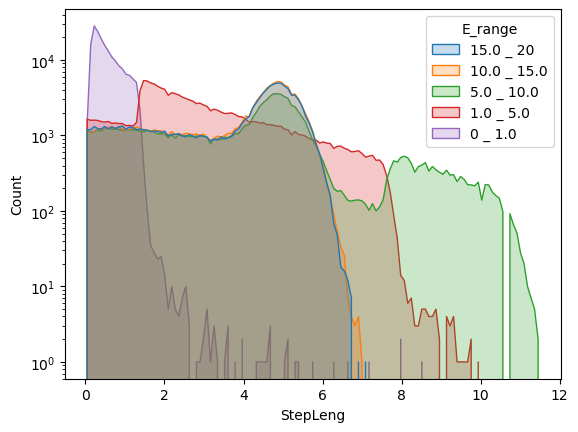

In [12]:
sns.histplot(data, x="StepLeng", hue="E_range", element="poly",log_scale=(False,True))

Here we clearly have the first two energy ranges overlapping and the third others too.
One can distinguish two distributions splitted at E = 7.8 MeV. 

In [13]:
energy_ranges = [7.8, 7.8]
data = map_energy_ranges(data, energy_ranges)

<AxesSubplot: xlabel='StepLeng', ylabel='Count'>

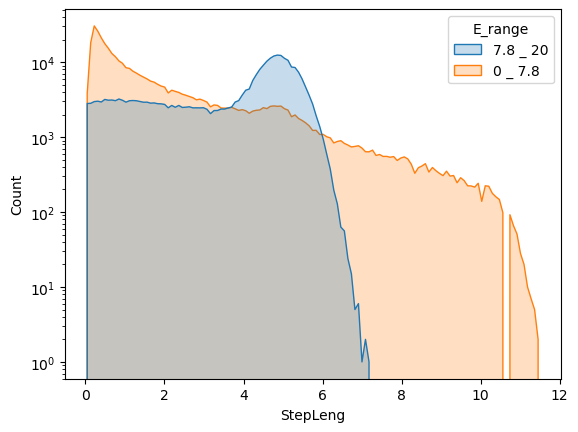

In [14]:
sns.histplot(data, x="StepLeng", hue="E_range", element="poly",log_scale=(False,True))

<AxesSubplot: xlabel='dE(MeV)', ylabel='Count'>

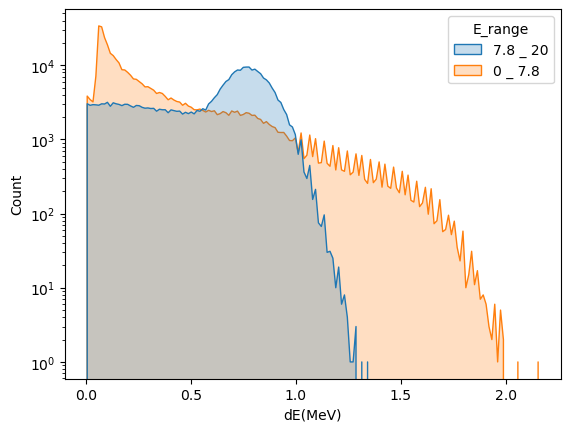

In [16]:
sns.histplot(data, x="dE(MeV)", hue="E_range", element="poly",log_scale=(False,True))

We see that dE and StepLeng are smooth distributions under these energy ranges. We can also study the other parameters (Physical interpretation: electron with less energy will travel further and at the same time lose less energy).

<AxesSubplot: xlabel='cos_theta', ylabel='Count'>

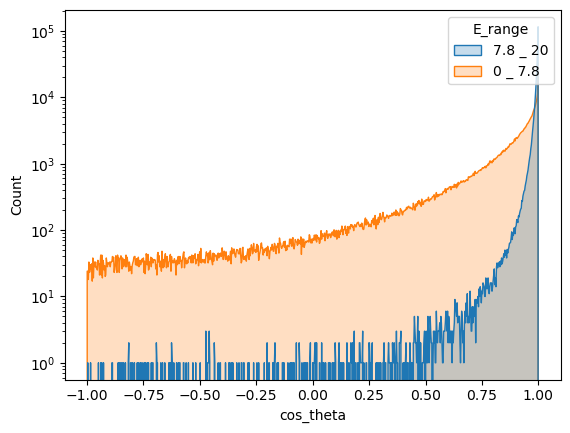

In [17]:
sns.histplot(data, x="cos_theta", hue="E_range", element="poly",log_scale=(False,True))

In [18]:
energy_ranges = [1,5,10,15]
data = map_energy_ranges(data, energy_ranges)

<AxesSubplot: xlabel='cos_theta', ylabel='Density'>

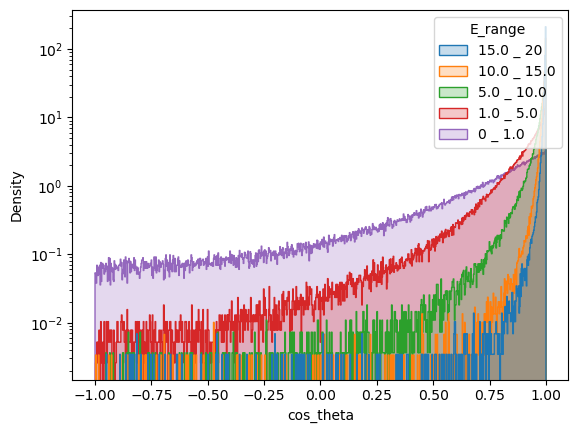

In [26]:
sns.histplot(
    data, x="cos_theta", hue="E_range", element="step",
    stat="density", common_norm=False, log_scale=(False,True)
)

For cos_theta we also observe almost the same distribution for < 7.8 and > 7.8 distributions

## Is there energy ranges for emissions ?

In [27]:
data_emission = data.copy(deep = True)

<AxesSubplot: xlabel='KinE(MeV)', ylabel='Density'>

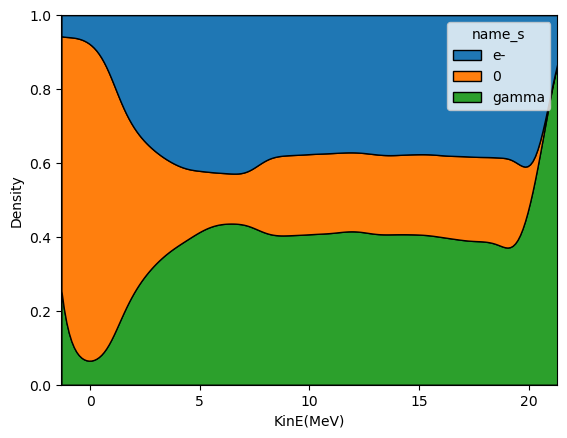

In [28]:
sns.kdeplot(data=data_emission, x="KinE(MeV)", hue="name_s", common_norm=False, multiple="fill", alpha=1)

#### The fact that an initial electron generates a daughter particle depends on the energy of the initial particle. 

Do we need to split the analysis depending on the particle ? The E_range will map every electron into a category range of energy.

In [33]:
data_emission['name_s'] = data_emission['name_s'].apply(type_to_num)

In [34]:
data_0 = data_emission.loc[data_emission['name_s'] == 0]
print(data_0.shape)

(441704, 20)


In [35]:
data_e = data_emission.loc[data_emission['name_s'] == 1]
print(data_e.shape)

(182608, 20)


In [36]:
data_g = data_emission.loc[data_emission['name_s'] == 2]
print(data_g.shape)

(56731, 20)


Text(0.5, 1.0, 'gamma')

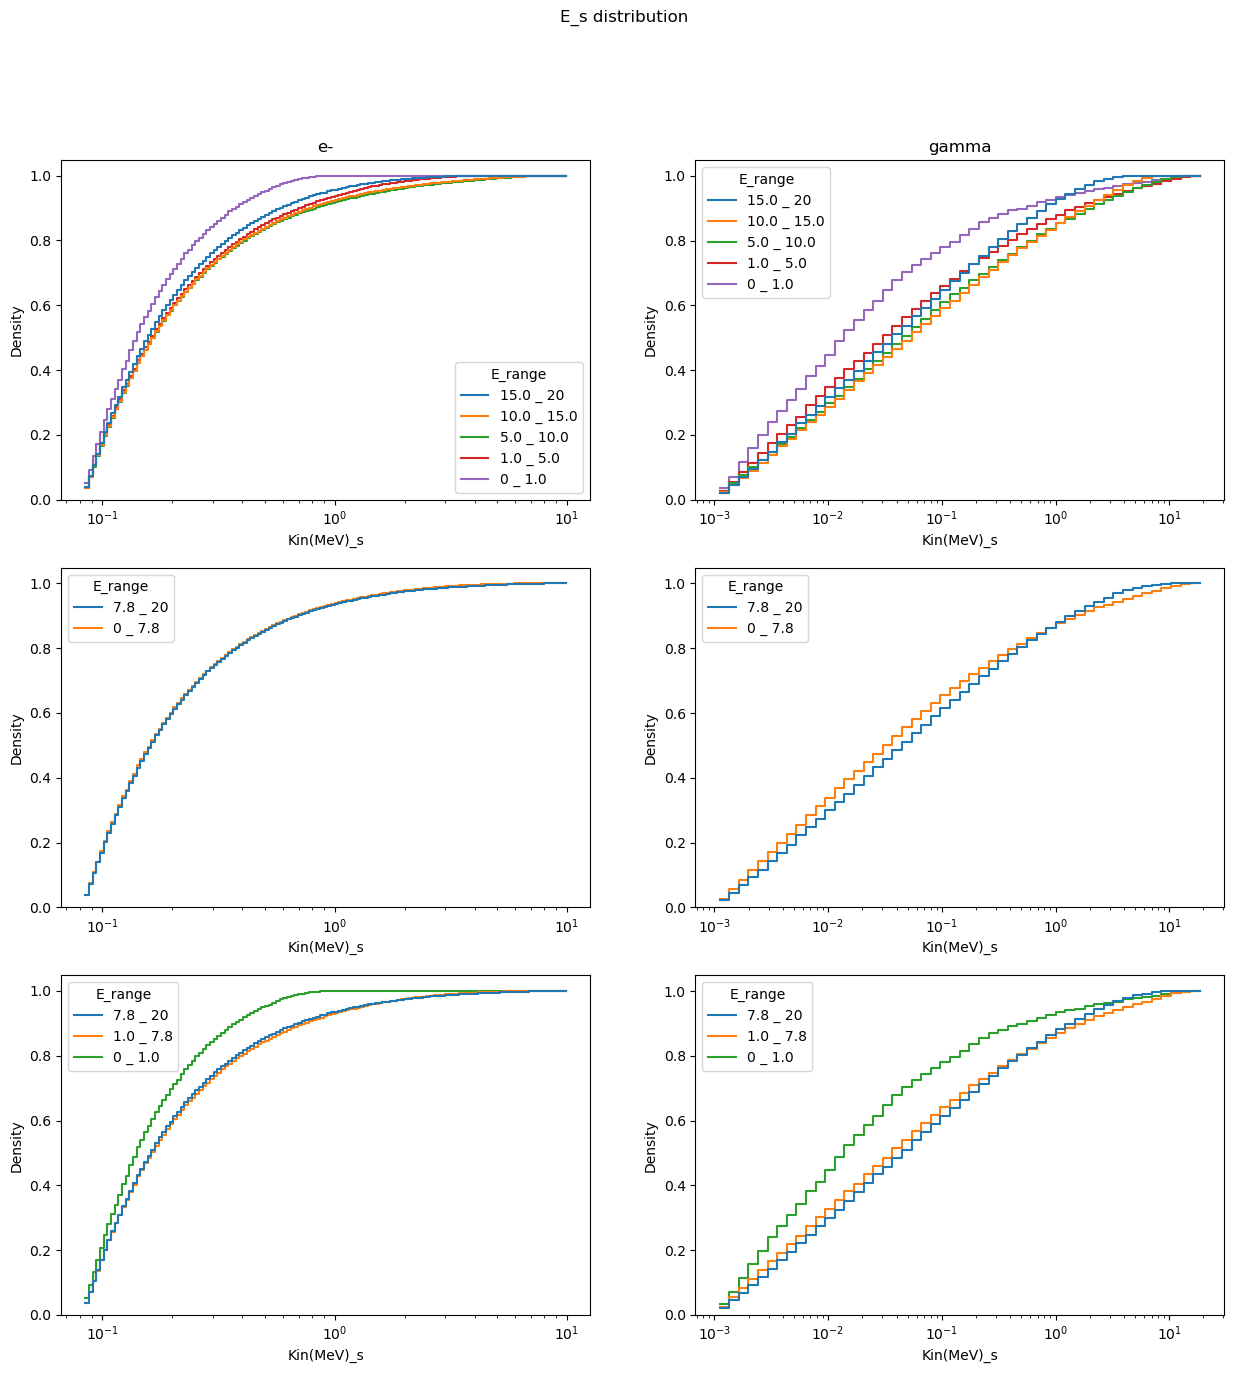

In [37]:
energy_ranges = [1,5,10,15]
data_emission = map_energy_ranges(data_emission, energy_ranges)

data_0 = data_emission.loc[data_emission['name_s'] == 0]
data_e = data_emission.loc[data_emission['name_s'] == 1]
data_g = data_emission.loc[data_emission['name_s'] == 2]


fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=False)
fig.suptitle('E_s distribution')

hue_order = data_emission['E_range'].unique().tolist()

# e-
sns.histplot(
    ax=axes[0,0],
    data=data_e, x="Kin(MeV)_s", hue="E_range",
    hue_order=hue_order,
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

# gamma
sns.histplot(
    ax=axes[0,1],
    data=data_g, x="Kin(MeV)_s", hue="E_range",
    hue_order=hue_order,
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

# Now we change the possible range of electron

energy_ranges = [7.8]
data_emission = map_energy_ranges(data_emission, energy_ranges)
data_e = data_emission.loc[data_emission['name_s'] == 1]
data_g = data_emission.loc[data_emission['name_s'] == 2]

hue_order = data_emission['E_range'].unique().tolist()

#e- 
sns.histplot(
    ax=axes[1,0],
    data=data_e, x="Kin(MeV)_s", hue="E_range",
    hue_order=hue_order,
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

# gamma
sns.histplot(
    ax=axes[1,1],
    data=data_g, x="Kin(MeV)_s", hue="E_range",
    hue_order=hue_order,
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

#We change again the ranges

energy_ranges = [1, 7.8]
data_emission = map_energy_ranges(data_emission, energy_ranges)
data_e = data_emission.loc[data_emission['name_s'] == 1]
data_g = data_emission.loc[data_emission['name_s'] == 2]

hue_order = data_emission['E_range'].unique().tolist()

sns.histplot(
    ax=axes[2,0],
    data=data_e, x="Kin(MeV)_s", hue="E_range",
    hue_order=hue_order,
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

# gamma
sns.histplot(
    ax=axes[2,1],
    data=data_g, x="Kin(MeV)_s", hue="E_range",
    hue_order=hue_order,
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

axes[0,0].set_title('e-')
axes[0,1].set_title('gamma')

From this cumulative density plots above, one can conclude that from 0 to 1 MeV for the parent electron, the daughter particle will have lower energies than for Energie ranges from 1 to 20 MeV of the parent. Indeed, the density for low energy range reach higher values (y-axis) for lower values of Kin(MeV)s (x-axis) which corresponds to daughter particle energy. 
From this observation, a good split of energy ranges to predict Kin(MeV)s would be 0-1 MeV and 1-20 MeV but as seen earlier, it is not suited for the other parameters to predict. 
For daughter particles, the most important predictions is its energy since it will determine if it will stay in the system for a long time or not. We choose to focus on this.

### Conclusion of analysis

We will split our GAN Models depending on the electron emission or not, and its energy.

For no-emission, we split on 7.8 MeV 

For emission, we split first on whether we emit a photon or electron and then energy split at 1 MeV.